7490271 чехол для наушников

In [ ]:
! pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

import copy
from copy import deepcopy

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


------------

In [ ]:
data = pd.read_csv('/content/7490271(17.03.2022-17.06.2022).csv', sep=';')

In [ ]:
data

,Дата,Продажи,Остаток,Цена,Со скидкой и промо,Скидка,Цена со скидкой,Промокод,СПП,Цена с СПП,Сумма продаж,Комментариев,Рейтинг
0,2022-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-06-17,0,286.0,846.0,194.0,77.0,194.0,0.0,0.0,194.0,0,1653.0,4.0
2,2022-06-16,0,286.0,846.0,194.0,77.0,194.0,0.0,0.0,194.0,0,1653.0,4.0
3,2022-06-15,3,284.0,846.0,194.0,77.0,194.0,0.0,0.0,194.0,582,1651.0,4.0
4,2022-06-14,1,286.0,846.0,194.0,77.0,194.0,0.0,0.0,194.0,194,1650.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Среднее (в день),5 шт,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"909,17 ₽",NaN,NaN
96,Дней с наличием,93 дней,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Среднее при наличии,5 шт,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"909,17 ₽",NaN,NaN
98,Потенциал,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"84 553,00 ₽",NaN,NaN


Возьмем данные за период с 18.03.2022 по 15.06.2022. 

In [ ]:
data = data[3:93]

In [ ]:
data = data.sort_values(by='Дата').reset_index(drop=True) 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Дата                90 non-null     object 
 1   Продажи             90 non-null     object 
 2   Остаток             90 non-null     float64
 3   Цена                90 non-null     float64
 4   Со скидкой и промо  90 non-null     float64
 5   Скидка              90 non-null     float64
 6   Цена со скидкой     90 non-null     float64
 7   Промокод            90 non-null     float64
 8   СПП                 90 non-null     float64
 9   Цена с СПП          90 non-null     float64
 10  Сумма продаж        90 non-null     object 
 11  Комментариев        90 non-null     float64
 12  Рейтинг             90 non-null     float64
dtypes: float64(10), object(3)
memory usage: 9.3+ KB


In [ ]:
data['Дата'] = pd.to_datetime(data['Дата'], format='%Y-%m-%d')

In [ ]:
data['Продажи'] = data['Продажи'].astype('int')
data['Сумма продаж'] = data['Сумма продаж'].astype('float64')

In [ ]:
data = data[['Дата', 'Продажи', 'Остаток', 'Цена', 'Со скидкой и промо', 'Скидка', 'Сумма продаж',
       'Комментариев', 'Рейтинг']]

In [ ]:
data.columns = ['Дата', 'Продажи', 'Остаток', 'Цена', 'Цена_со_скидкой', 'Скидка',
       'Сумма_продаж', 'Комментариев', 'Рейтинг']

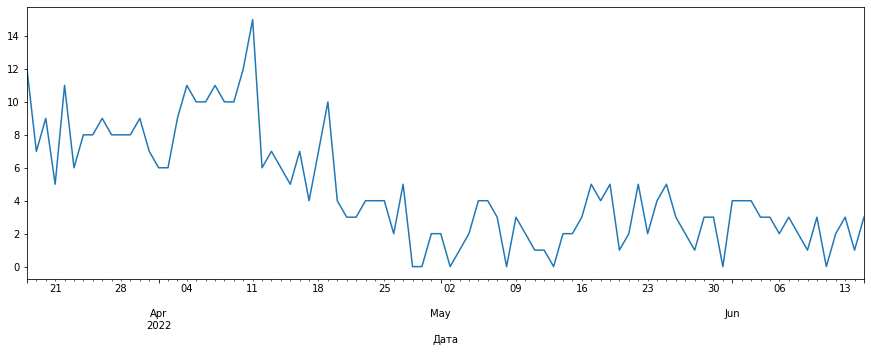

In [ ]:
data.set_index('Дата')['Продажи'].plot(figsize=(15,5))

Проведем сезонную декомпозицию продаж.

In [ ]:
decomposed = seasonal_decompose(data.set_index('Дата')['Продажи'])

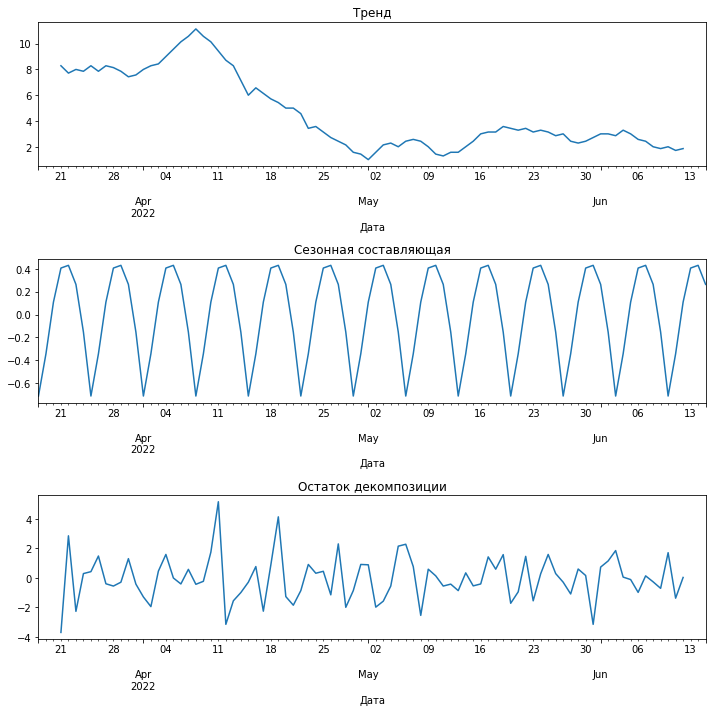

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Сезонная составляющая')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Остаток декомпозиции')

plt.tight_layout()

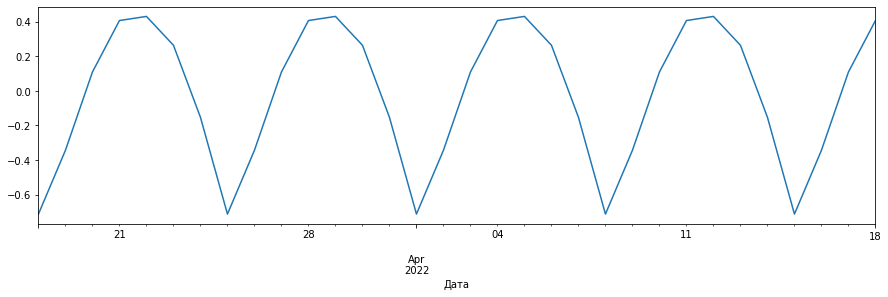

In [ ]:
decomposed.seasonal['2022-03-18':'2022-04-18'].plot(figsize=(15, 4)) 

По тренду наблюдаем снижение продаж еженедельные закономерности в изменении количества заказов. 

---------

In [ ]:
data_analogi = pd.read_csv('/content/P7490271(18.03.2022 - 17.06.2022).csv', sep=';')

In [ ]:
data_analogi

,Дата,Товаров,Товаров с продажами,Продаж,Выручка,Средняя цена,Ср. цена продажи,Комментарии,Рейтинг
0,2022-06-17,177.0,36.0,244,40986,"268,6949152542373","167,97540983606558","585,2283950617284","4,1234567901234565"
1,2022-06-16,177.0,41.0,307,53217,"269,07909604519773","173,34527687296418","584,7592592592592","4,1234567901234565"
2,2022-06-15,177.0,39.0,299,50550,"268,96610169491527","169,06354515050168","583,7283950617284","4,104938271604938"
3,2022-06-14,177.0,37.0,287,49179,"268,6497175141243","171,3554006968641","582,6172839506173","4,104938271604938"
4,2022-06-13,177.0,38.0,322,54376,268,"168,8695652173913","580,6296296296297","4,104938271604938"
...,...,...,...,...,...,...,...,...,...
88,2022-03-21,176.0,21.0,63,13413,"268,73295454545456","212,9047619047619","302,3726708074534","4,080745341614906"
89,2022-03-20,176.0,19.0,55,12314,"268,73295454545456","223,8909090909091","302,3726708074534","4,080745341614906"
90,2022-03-19,176.0,16.0,47,10184,"268,73295454545456","216,68085106382978","302,3726708074534","4,080745341614906"
91,2022-03-18,103.0,17.0,35,7571,"212,2621359223301","216,31428571428572","393,2772277227723","4,198019801980198"


In [ ]:
data_analogi = data_analogi[2:92]

In [ ]:
data_analogi = data_analogi.sort_values(by='Дата').reset_index(drop=True) 

In [ ]:
data_analogi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Дата                 90 non-null     object 
 1   Товаров              90 non-null     float64
 2   Товаров с продажами  90 non-null     float64
 3   Продаж               90 non-null     int64  
 4   Выручка              90 non-null     int64  
 5   Средняя цена         90 non-null     object 
 6   Ср. цена продажи     90 non-null     object 
 7   Комментарии          90 non-null     object 
 8   Рейтинг              90 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 6.5+ KB


In [ ]:
data_analogi['Дата'] = pd.to_datetime(data_analogi['Дата'], format='%Y-%m-%d')

In [ ]:
data_analogi['Средняя цена'] = data_analogi['Средняя цена'].apply(lambda x: x.replace(',','.'))
data_analogi['Ср. цена продажи'] = data_analogi['Ср. цена продажи'].apply(lambda x: x.replace(',','.'))
data_analogi['Комментарии'] = data_analogi['Комментарии'].apply(lambda x: x.replace(',','.'))
data_analogi['Рейтинг'] = data_analogi['Рейтинг'].apply(lambda x: x.replace(',','.'))

In [ ]:
data_analogi['Средняя цена'] = round(data_analogi['Средняя цена'].astype('float64'),2)
data_analogi['Ср. цена продажи'] = round(data_analogi['Ср. цена продажи'].astype('float64'),2)
data_analogi['Комментарии'] = round(data_analogi['Комментарии'].astype('float64'),2)
data_analogi['Рейтинг'] = round(data_analogi['Рейтинг'].astype('float64'),2)

In [ ]:
data_analogi.columns = ['Дата', 'Товаров_аналог', 'Товаров_аналог_с_продажами', 'Продаж_аналогичных', 'Выручка',
       'Средняя_цена_аналог', 'Средняя_цена_продажи_аналог', 'Комментарии_аналог', 'Рейтинг_аналог']

In [ ]:
#data_itog = data.merge(data_analogi, left_on='Дата', right_on='Дата')

In [ ]:
#data_itog

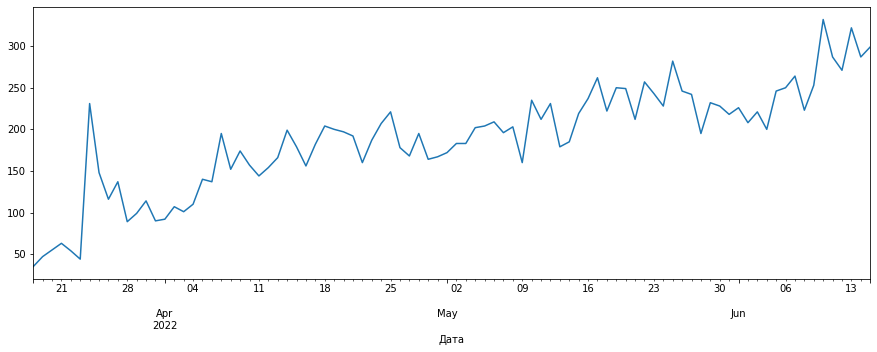

In [ ]:
data_analogi.set_index('Дата')['Продаж_аналогичных'].plot(figsize=(15,5))

Проведем сезонную декомпозицию продаж.

In [ ]:
decomposed = seasonal_decompose(data_analogi.set_index('Дата')['Продаж_аналогичных'])

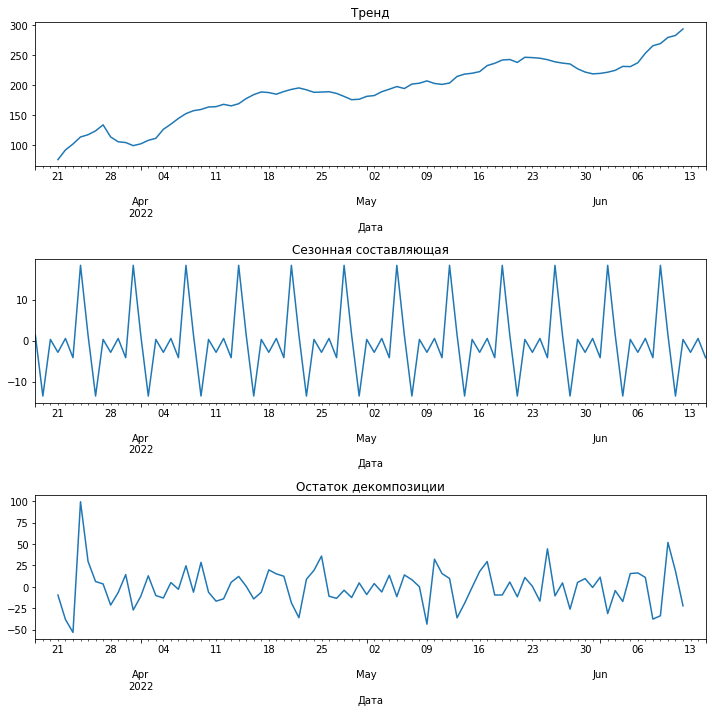

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Сезонная составляющая')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Остаток декомпозиции')

plt.tight_layout()

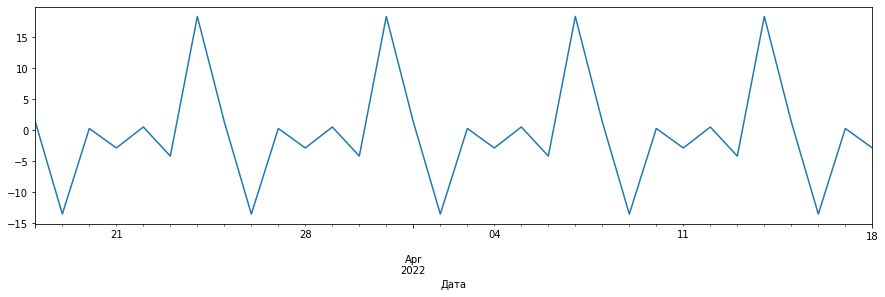

In [ ]:
decomposed.seasonal['2022-03-18':'2022-04-18'].plot(figsize=(15, 4)) 

По тренду наблюдаем рост продаж аналогичных товаров и еженедельные закономерности в изменении количества заказов. 

------

-----------

Для построения модели прогнозирования продаж предварительно построим следующие прогнозы:

- предскажем среднюю цену продажи по аналогичным товарам.

- предскажем количество проданных аналогичных товаров.

----------

-----------

Предскажем среднюю цену продажи по аналогичным товарам.

In [ ]:
data_analog_propnet = deepcopy(data_analogi[['Дата','Средняя_цена_продажи_аналог']])

In [ ]:
data_analog_propnet

,Дата,Средняя_цена_продажи_аналог
0,2022-03-18,216.31
1,2022-03-19,216.68
2,2022-03-20,223.89
3,2022-03-21,212.90
4,2022-03-22,293.98
...,...,...
85,2022-06-11,169.82
86,2022-06-12,165.16
87,2022-06-13,168.87
88,2022-06-14,171.36


In [ ]:
data_analog_propnet.columns = ['ds', 'y']

In [ ]:
m_analog = Prophet()
m_analog.fit(data_analog_propnet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_analog = m_analog.make_future_dataframe(periods=30)
future_analog.tail()

,ds
115,2022-07-11
116,2022-07-12
117,2022-07-13
118,2022-07-14
119,2022-07-15


In [ ]:
forecast_analog = m_analog.predict(future_analog)
forecast_analog[['ds', 'yhat']].tail(30)

,ds,yhat
90,2022-06-16,167.451671
91,2022-06-17,160.331264
92,2022-06-18,162.270733
93,2022-06-19,160.899195
94,2022-06-20,160.294368
95,2022-06-21,164.522959
96,2022-06-22,165.981584
97,2022-06-23,166.622982
98,2022-06-24,159.502576
99,2022-06-25,161.442044


------------

---------------

Предскажем количество проданных аналогичных товаров.

In [ ]:
data_analog_prod = deepcopy(data_analogi[['Дата','Продаж_аналогичных']])

In [ ]:
data_analog_prod

,Дата,Продаж_аналогичных
0,2022-03-18,35
1,2022-03-19,47
2,2022-03-20,55
3,2022-03-21,63
4,2022-03-22,54
...,...,...
85,2022-06-11,287
86,2022-06-12,271
87,2022-06-13,322
88,2022-06-14,287


In [ ]:
data_analog_prod.columns = ['ds', 'y']

In [ ]:
m_analog_prod = Prophet()
m_analog_prod.fit(data_analog_prod)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_analog_prod = m_analog_prod.make_future_dataframe(periods=30)
future_analog_prod.tail()

,ds
115,2022-07-11
116,2022-07-12
117,2022-07-13
118,2022-07-14
119,2022-07-15


In [ ]:
forecast_analog_prod = m_analog_prod.predict(future_analog_prod)
forecast_analog_prod[['ds', 'yhat']].tail(30)

,ds,yhat
90,2022-06-16,303.409577
91,2022-06-17,284.641919
92,2022-06-18,274.414388
93,2022-06-19,290.558401
94,2022-06-20,291.709915
95,2022-06-21,295.398803
96,2022-06-22,294.628366
97,2022-06-23,318.108799
98,2022-06-24,299.341141
99,2022-06-25,289.113610


-----------

------

Предскажем продажи на 30 дней вперед (для прогноза предоставлен слишком маленький период исторических данных).

Среднюю цену и количество продаж аналогичных товаров мы предсаказали выше. 

Зафиксируем нашу цену на продажу товара на уровне 2022-06-15. 

Также в модель добавим признак "день недели", так как наблюдается еженедельная зависимость.

В связи с небольшим объемом выборки ограничимся этими признаками.

При увеличении объема исторических данных имеет смысл ввести признаки "праздничный день", "день", "месяц", "год", "предыдущее значение", "скользящее среднее" и др.

In [ ]:
data_profnet = deepcopy(data[['Дата','Продажи']])

In [ ]:
data_profnet

,Дата,Продажи
0,2022-03-18,12
1,2022-03-19,7
2,2022-03-20,9
3,2022-03-21,5
4,2022-03-22,11
...,...,...
85,2022-06-11,0
86,2022-06-12,2
87,2022-06-13,3
88,2022-06-14,1


In [ ]:
data_profnet.columns = ['ds', 'y']

In [ ]:
def avg_price_analog(ds): # Средняя_цена_продажи_аналог
     
    if data_profnet.loc[data_profnet['ds'] == ds]['avg_price'].empty:
        return forecast_analog.loc[forecast_analog['ds'] == ds]['yhat'].values[0]
    else:
        return (data_analogi.loc[data_analogi['Дата'] == ds]['Средняя_цена_продажи_аналог']).values[0]
   
    return 0

In [ ]:
def prod_analog(ds): # Продаж_аналогичных
     
    if data_profnet.loc[data_profnet['ds'] == ds]['prod'].empty:
        return forecast_analog_prod.loc[forecast_analog_prod['ds'] == ds]['yhat'].values[0]
    else:
        return (data_analogi.loc[data_analogi['Дата'] == ds]['Продаж_аналогичных']).values[0]
   
    return 0

In [ ]:
def price_future(ds): # фиксируем цену на месяц 
     
    if data_profnet.loc[data_profnet['ds'] == ds]['price'].empty:
        return 194
    else:
        return (data.loc[data_analogi['Дата'] == ds]['Цена_со_скидкой']).values[0]
   
    return 0

In [ ]:
m = Prophet()

In [ ]:
m.add_regressor('avg_price')

In [ ]:
m.add_regressor('prod')

In [ ]:
m.add_regressor('price')

In [ ]:
m.add_regressor('day_of_week')

In [ ]:
data_profnet['avg_price'] = deepcopy(data_analogi['Средняя_цена_продажи_аналог'])

In [ ]:
data_profnet['prod'] = deepcopy(data_analogi['Продаж_аналогичных'])

In [ ]:
data_profnet['price'] = deepcopy(data['Цена_со_скидкой'])

In [ ]:
data_profnet['day_of_week'] = data_profnet['ds'].dt.dayofweek

In [ ]:
m.fit(data_profnet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=30)

In [ ]:
future['avg_price'] = future['ds'].apply(avg_price_analog)

In [ ]:
future['prod'] = future['ds'].apply(prod_analog)

In [ ]:
future['price'] = future['ds'].apply(price_future)

In [ ]:
future['day_of_week'] = future['ds'].dt.dayofweek

In [ ]:
forecast = m.predict(future)

In [ ]:
forecast.loc[(forecast.yhat<0),'yhat'] = 0 

In [ ]:
forecast['round_yhat'] = round(forecast['yhat'])

In [ ]:
forecast[['ds', 'round_yhat']].tail(30)

,ds,round_yhat
90,2022-06-16,2.0
91,2022-06-17,1.0
92,2022-06-18,1.0
93,2022-06-19,2.0
94,2022-06-20,2.0
95,2022-06-21,2.0
96,2022-06-22,2.0
97,2022-06-23,1.0
98,2022-06-24,1.0
99,2022-06-25,1.0


Реальные продажи:

2022-06-19	1

2022-06-18	3

2022-06-17	0

2022-06-16	0

Считаю, что для анализа и прогнозирования с помощью примененной модели Prophnet недостаточно данных.